Simple Linear Regression : Simple linear regression aims to find a linear relationship to describe the correlation between an independent and possibly dependent variable. The regression line can be used to predict or estimate missing values, this is known as interpolation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


In [ ]:
from google.colab import files
df = files.upload()

Saving 01Students.csv to 01Students.csv


In [ ]:
df


{'01Students.csv': b'Hours,Marks\r\n0,34\r\n1,36\r\n1,33\r\n1,39\r\n1,42\r\n2,45\r\n2,38\r\n3,45\r\n3,53\r\n3,46\r\n3,56\r\n4,59\r\n4,55\r\n4,56\r\n5,72\r\n5,59\r\n6,62\r\n6,71\r\n7,78\r\n7,88\r\n7,61\r\n7,74\r\n8,71\r\n8,89\r\n9,82\r\n9,67\r\n9,89\r\n10,81\r\n10,82\r\n11,79\r\n'}

In [ ]:
df = pd.read_csv("01Students.csv")
df

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46


In [ ]:
df_copy = pd.read_csv("01Students.csv")

In [ ]:
df_copy

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46


Data Preprocessing (EDA)

In [ ]:
df.shape

(30, 2)

In [ ]:
df.head()

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42


In [ ]:
df.tail()

,Hours,Marks
25,9,67
26,9,89
27,10,81
28,10,82
29,11,79


In [ ]:
df.iloc[10:20]

,Hours,Marks
10,3,56
11,4,59
12,4,55
13,4,56
14,5,72
15,5,59
16,6,62
17,6,71
18,7,78
19,7,88


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


Data Cleaning

The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [ ]:
df.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


In [ ]:
# x = Independant Value
# y = Predicted Value
x = df.iloc[ :, :-1]
y = df.iloc[ :, -1]

In [ ]:
x

,Hours
0,0
1,1
2,1
3,1
4,1
5,2
6,2
7,3
8,3
9,3


In [ ]:
y

0     34
1     36
2     33
3     39
4     42
5     45
6     38
7     45
8     53
9     46
10    56
11    59
12    55
13    56
14    72
15    59
16    62
17    71
18    78
19    88
20    61
21    74
22    71
23    89
24    82
25    67
26    89
27    81
28    82
29    79
Name: Marks, dtype: int64

Train_Test_Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state= 8)

In [ ]:
x_train

,Hours
26,9
28,10
12,4
10,3
27,10
13,4
16,6
24,9
19,7
8,3


In [ ]:
y_train

26    89
28    82
12    55
10    56
27    81
13    56
16    62
24    82
19    88
8     53
5     45
9     46
17    71
20    61
3     39
Name: Marks, dtype: int64

In [ ]:
y_test

25    67
0     34
7     45
18    78
15    59
4     42
29    79
1     36
22    71
6     38
23    89
11    59
2     33
14    72
21    74
Name: Marks, dtype: int64

Model Building : Supervised single linear regression model because we have one x variable (Hours) and one y target variable (Marks)

In [ ]:
from sklearn.linear_model import LinearRegression
std_reg = LinearRegression()
std_reg.fit(x_train,y_train)

LinearRegression()

Evaluation

In [ ]:
y_predict = std_reg.predict(x_test)
y_predict

array([81.68152866, 35.93630573, 51.18471338, 71.51592357, 61.35031847,
       41.01910828, 91.84713376, 41.01910828, 76.59872611, 46.10191083,
       76.59872611, 56.26751592, 41.01910828, 61.35031847, 71.51592357])

In [ ]:
y_test

25    67
0     34
7     45
18    78
15    59
4     42
29    79
1     36
22    71
6     38
23    89
11    59
2     33
14    72
21    74
Name: Marks, dtype: int64

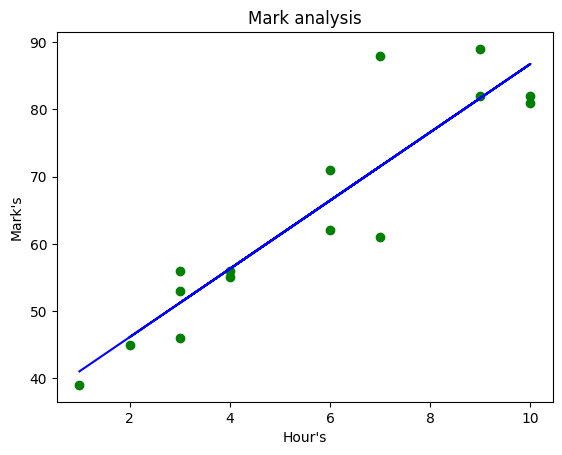

In [ ]:
plt.scatter(x_train,y_train,color="green")
plt.plot(x_train,std_reg.predict(x_train),color="blue")
plt.title("Mark analysis")
plt.xlabel("Hour's")
plt.ylabel("Mark's")
plt.show()

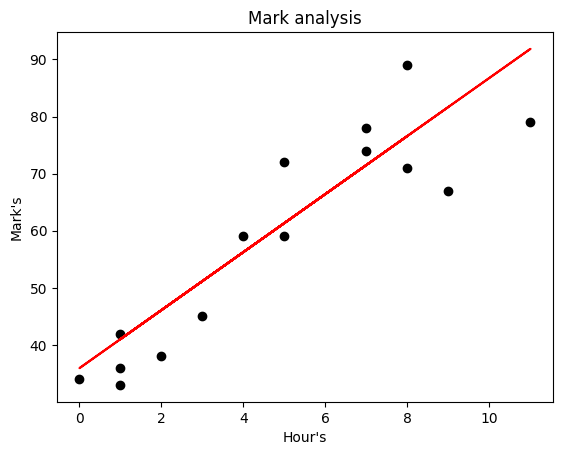

In [ ]:
plt.scatter(x_test,y_test,color="black")
plt.plot(x_test,std_reg.predict(x_test),color="red")
plt.title("Mark analysis")
plt.xlabel("Hour's")
plt.ylabel("Mark's")
plt.show()